In [ ]:
import zipfile
!unzip /content/train-20250108T013920Z-001.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.2560.jpg      
  inflating: train/dog.2570.jpg      
  inflating: train/dog.253.jpg       
  inflating: train/dog.2532.jpg      
  inflating: train/dog.260.jpg       
  inflating: train/dog.2619.jpg      
  inflating: train/dog.2533.jpg      
  inflating: train/dog.2531.jpg      
  inflating: train/dog.2524.jpg      
  inflating: train/dog.2530.jpg      
  inflating: train/dog.2523.jpg      
  inflating: train/dog.2515.jpg      
  inflating: train/dog.2546.jpg      
  inflating: train/dog.2563.jpg      
  inflating: train/dog.2539.jpg      
  inflating: train/dog.2514.jpg      
  inflating: train/dog.2559.jpg      
  inflating: train/dog.2516.jpg      
  inflating: train/dog.256.jpg       
  inflating: train/dog.2538.jpg      
  inflating: train/dog.254.jpg       
  inflating: train/dog.2535.jpg      
  inflating: train/dog.2528.jpg      
  inflating: train/dog.2526.jpg      
  inflating: train/dog.2517.jpg      

In [ ]:
import zipfile
!unzip /content/test-20250108T013851Z-001.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/4192.jpg           
  inflating: test/4158.jpg           
  inflating: test/4151.jpg           
  inflating: test/4198.jpg           
  inflating: test/4174.jpg           
  inflating: test/4177.jpg           
  inflating: test/4197.jpg           
  inflating: test/4196.jpg           
  inflating: test/4166.jpg           
  inflating: test/4148.jpg           
  inflating: test/4307.jpg           
  inflating: test/4161.jpg           
  inflating: test/4171.jpg           
  inflating: test/4165.jpg           
  inflating: test/4176.jpg           
  inflating: test/4178.jpg           
  inflating: test/4154.jpg           
  inflating: test/4219.jpg           
  inflating: test/4212.jpg           
  inflating: test/4185.jpg           
  inflating: test/4167.jpg           
  inflating: test/4179.jpg           
  inflating: test/4186.jpg           
  inflating: test/4164.jpg           
  inflating: test/4170.jpg           

In [2]:
import numpy as np
import pandas as pd
# import tensorflow as tf
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from google.colab import drive
drive.mount('/content/drive',force_remount = True)
%cd /content/drive/MyDrive/Colab_Notebooks/code/

Mounted at /content/drive
/content/drive/MyDrive/Colab_Notebooks/code


In [3]:
print(os.listdir("../data"))

['test', 'train']


**DEFINE CONSTANTS**

In [4]:
FAST_RUN = False
IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

**PREPARE TRAINING DATA**

In [5]:
filenames = os.listdir("../data/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [6]:
df.head()

,filename,category
0,dog.10229.jpg,1
1,dog.1024.jpg,1
2,dog.10278.jpg,1
3,dog.10271.jpg,1
4,dog.10283.jpg,1


In [7]:
df.tail()

,filename,category
25167,cat.9880.jpg,0
25168,cat.9852.jpg,0
25169,cat.9835.jpg,0
25170,cat.9899.jpg,0
25171,cat.9874.jpg,0


<Axes: xlabel='category'>

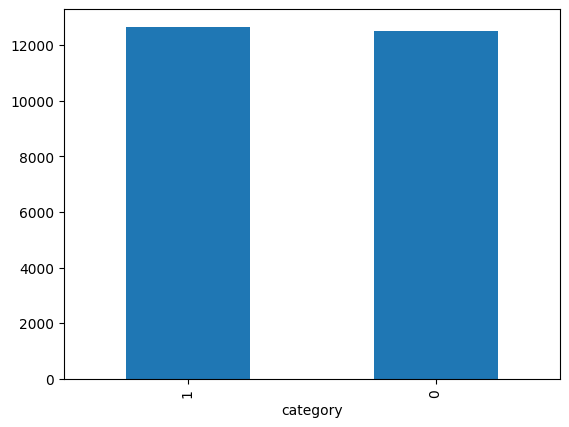

In [8]:
df['category'].value_counts().plot.bar()

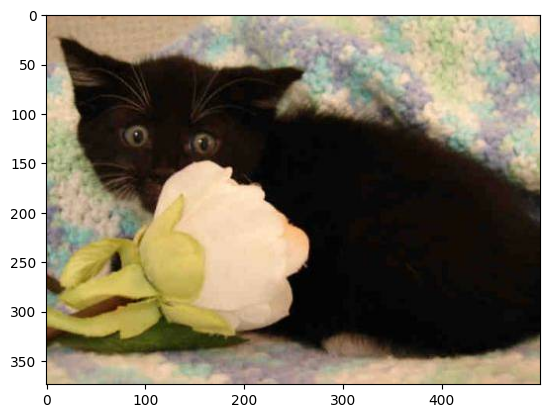

In [9]:
sample = random.choice(filenames)
image = load_img("../data/train/"+sample)
plt.imshow(image)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,207,266 (4.61 MB)

 Trainable params: 1,206,018 (4.60 MB)

 Non-trainable params: 1,248 (4.88 KB)

In [11]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [12]:
earlystop = EarlyStopping(patience=10)

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [14]:
callbacks = [earlystop, learning_rate_reduction]

In [15]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

In [16]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: xlabel='category'>

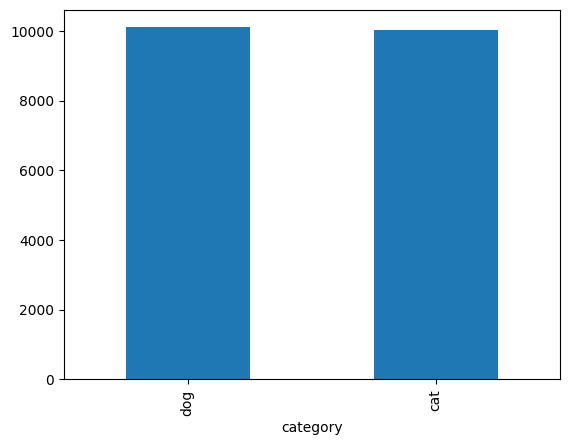

In [17]:
train_df['category'].value_counts().plot.bar()

<Axes: xlabel='category'>

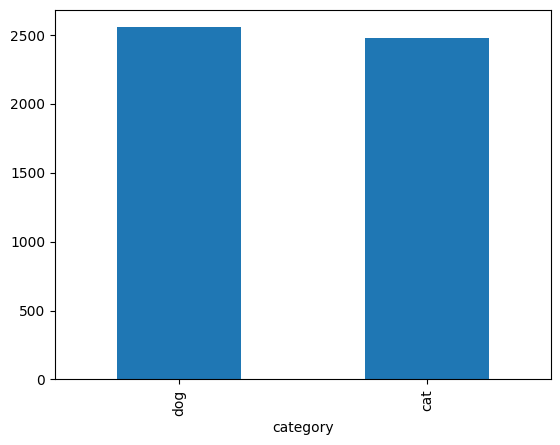

In [18]:
validate_df['category'].value_counts().plot.bar()

In [19]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [20]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [21]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "../data/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20137 validated image filenames belonging to 2 classes.


In [22]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "../data/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5035 validated image filenames belonging to 2 classes.


In [23]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "../data/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


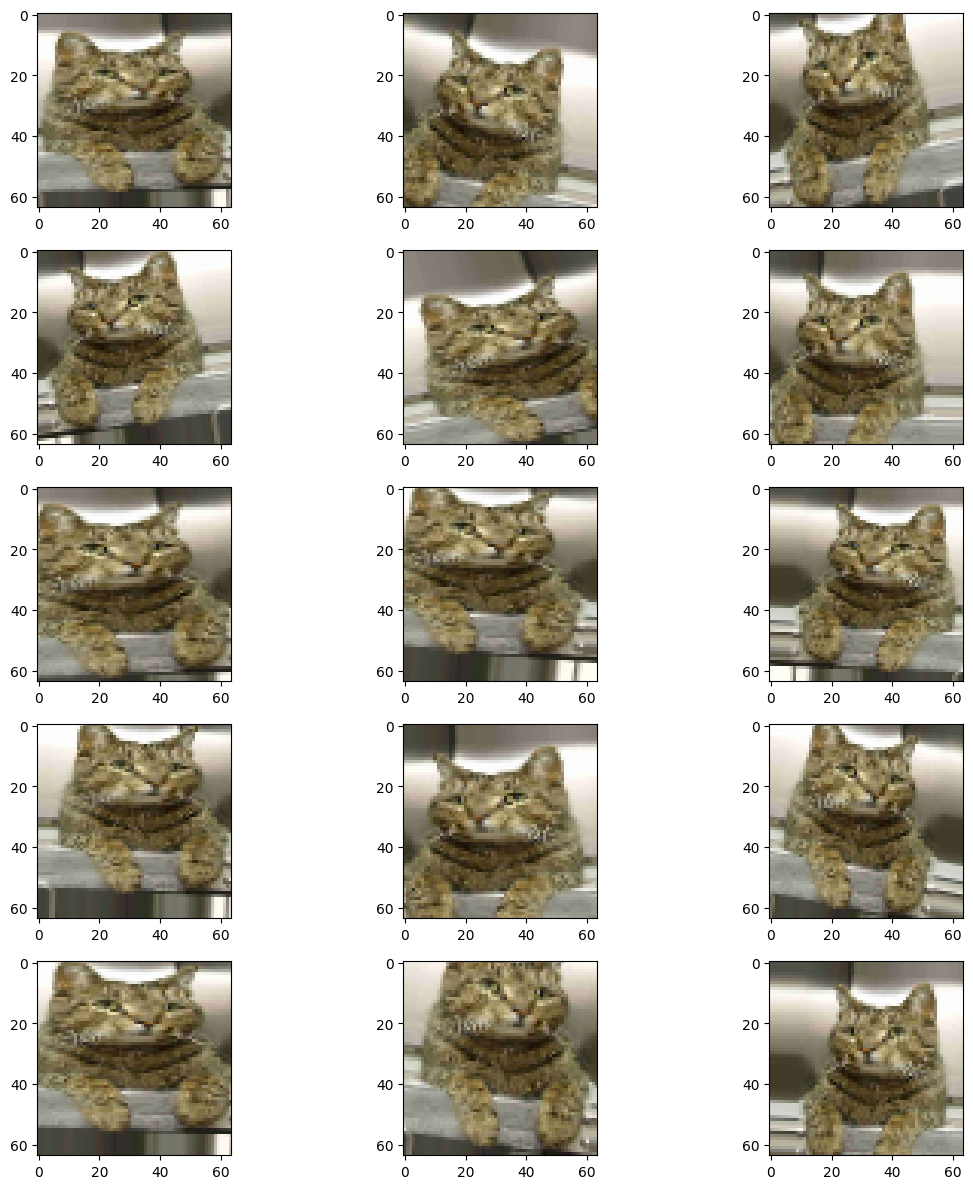

In [24]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [57]:
epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/15
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 241s 179ms/step - accuracy: 0.8077 - loss: 0.4276 - val_accuracy: 0.8289 - val_loss: 0.3992 - learning_rate: 1.0000e-05
Epoch 2/15
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 0s 29us/step - accuracy: 0.8000 - loss: 0.4296 - val_accuracy: 0.9000 - val_loss: 0.2679 - learning_rate: 1.0000e-05
Epoch 3/15
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 265s 182ms/step - accuracy: 0.8057 - loss: 0.4273 - val_accuracy: 0.8326 - val_loss: 0.4024 - learning_rate: 1.0000e-05
Epoch 4/15
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 1.0000 - loss: 0.2412 - val_accuracy: 0.7000 - val_loss: 0.6372 - learning_rate: 1.0000e-05
Epoch 5/15
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 244s 181ms/step - accuracy: 0.8003 - loss: 0.4320 - val_accuracy: 0.8312 - val_loss: 0.3982 - learning_rate: 1.0000e-05
Epoch 6/15
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.8000 - loss: 0.4190 - val_accuracy: 0.6000 - val_loss: 1.5110 - learning_rate: 1.0000e-05
Epoch 7/15
1342/1342 ━━━━━━━━━━━━━━━

In [58]:
model.save_weights("../models/model.weights.h5")

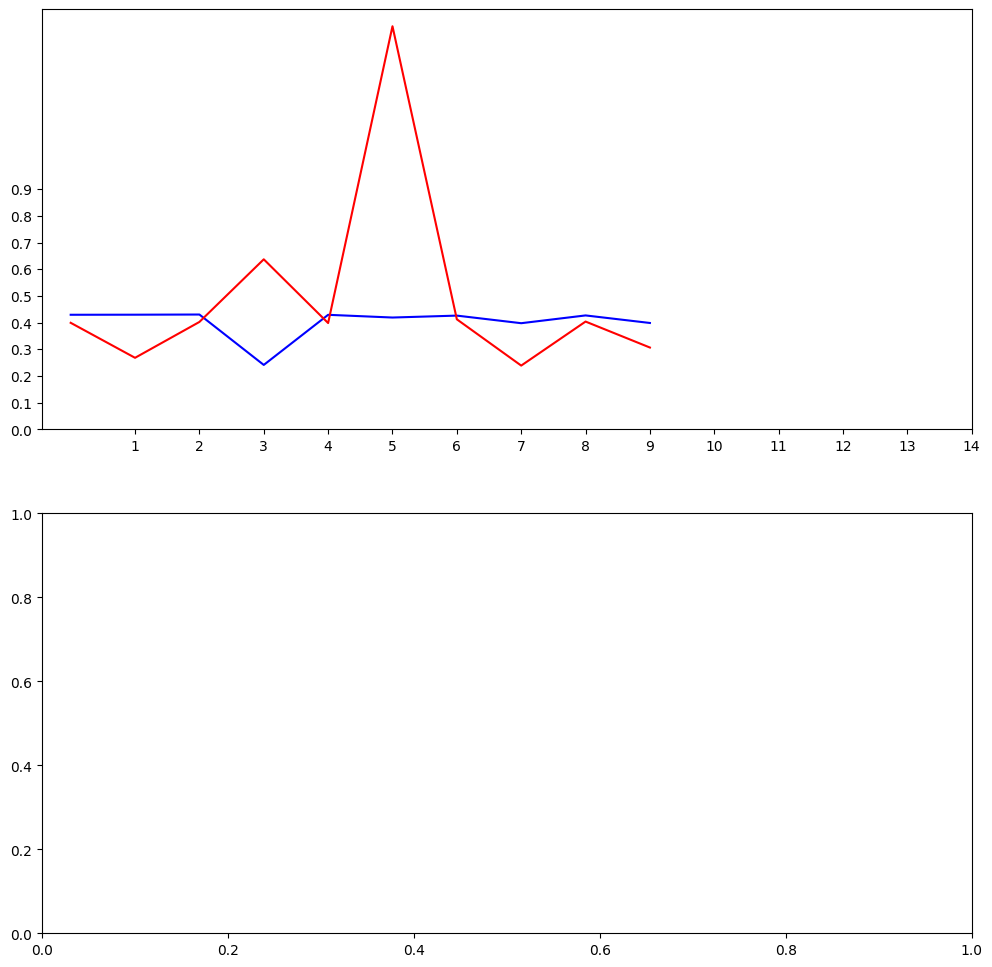

In [59]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

In [60]:
ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

<ipython-input-61-5788a53ba16b>:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = plt.legend(loc='best', shadow=True)


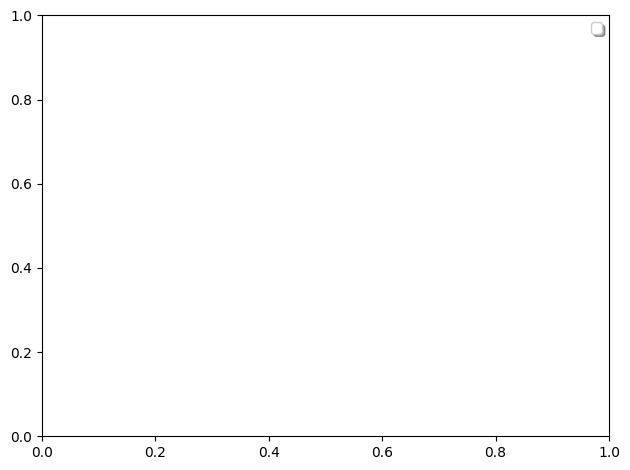

In [61]:
legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [62]:
test_filenames = os.listdir("../data/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [63]:
test_categories = []
for filename in test_filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        test_categories.append(1)
    else:
        test_categories.append(0)

In [64]:
test_df['True_labels'] = test_categories
test_df.head()

,filename,True_labels
0,88.jpg,0
1,127.jpg,0
2,147.jpg,0
3,132.jpg,0
4,94.jpg,0


In [65]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "../data/test",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12567 validated image filenames.


In [ ]:
predictions = model.predict(test_generator, steps=int(np.ceil(nb_samples/batch_size)))

  1/838 ━━━━━━━━━━━━━━━━━━━━ 2:06 151ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


838/838 ━━━━━━━━━━━━━━━━━━━━ 285s 340ms/step


In [40]:
test_df['category'] = np.argmax(predictions, axis=-1)

In [41]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [42]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

<ipython-input-42-338364ba4864>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })


<Axes: xlabel='category'>

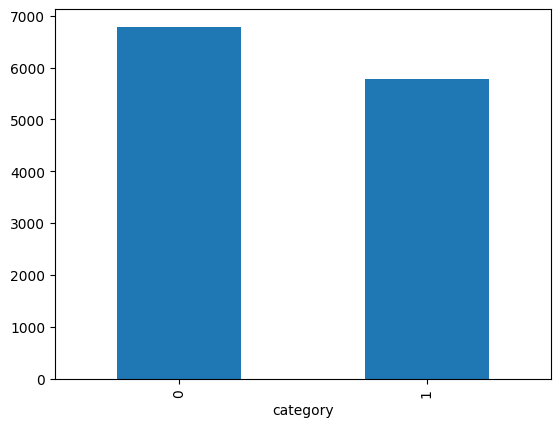

In [43]:
test_df['category'].value_counts().plot.bar()

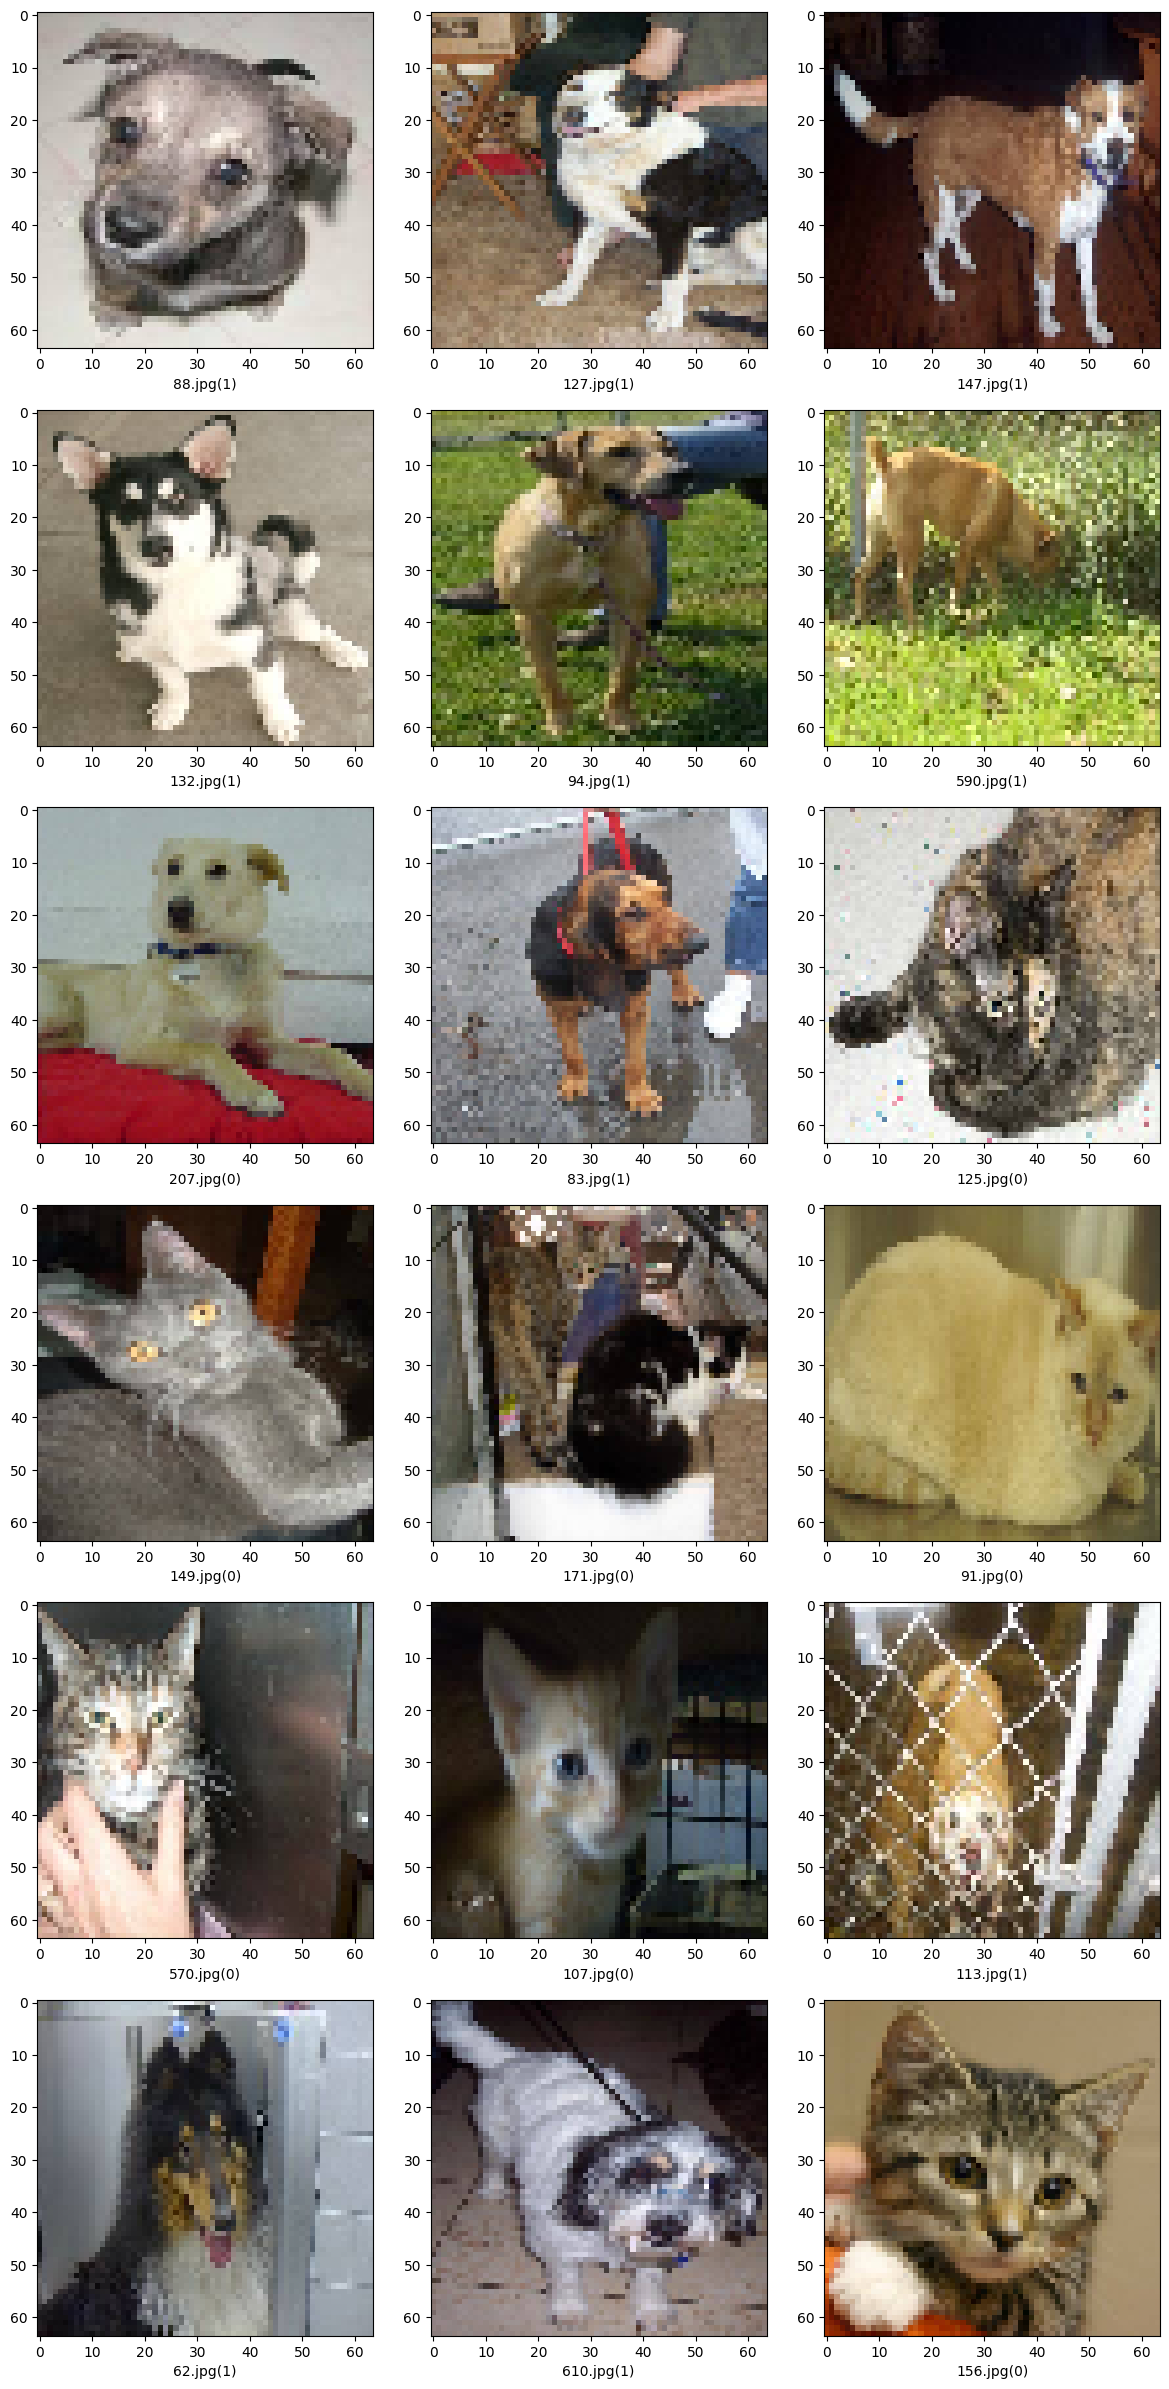

In [44]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("../data/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [45]:
result_df = test_df.copy()
result_df['id'] = result_df['filename'].str.split('.').str[0]
result_df['label'] = result_df['category']
result_df.drop(['filename', 'category'], axis=1, inplace = True)
result_df.to_csv('result.csv', index = False)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
result_df.head()

,True_labels,id,label
0,0,88,1
1,0,127,1
2,0,147,1
3,0,132,1
4,0,94,1


In [48]:
result = confusion_matrix(result_df['True_labels'],result_df['label'])

In [49]:
print(result)

[[6784 5783]
 [   0    0]]
